In [1]:
## The following steps are executed in the model
# 1. Exploratory Data Analysis - Univariate and Bivariate analysis of both continuous and categorical variables. 
# Some derived variable have been created
# 2. Data Preparation - Dummies have been created. Data has been split into training sets and testing sets. 
# The continous data has been scaled
# 3. Model Building and Evaluation - Over here the traditional linear regression has been used for feature engineering. 
# Several rounds of regression have been run and Features have been dropped depending on p-values and multi collinearity
# 4. Model Building using Ridge and Lasso Regression - Over here the a new model has been built using ridge and lasso regression
# Lasso regression can be used for feature selection

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Read data
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Exploratory Data Analysis

In [5]:
print (df.shape)
print (df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [6]:
# Address the missing data variable by variable

year = datetime.date.today().year
# Alley

#Replace NA with NAA since NA implies No Alley Access (NAA)
df['Alley'] = df['Alley'].fillna('NAA')

In [7]:
# MasVnrType and MasVnrArea 
# Replace NA by None

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [8]:
# BsmtQual 
# BsmtCond
# BsmtExposure
# BsmtFinType1
# BsmtFinType2
# Replace NA by NB (No Basement)

df['BsmtQual'] = df['BsmtQual'].fillna('NB')
df['BsmtCond'] = df['BsmtCond'].fillna('NB')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NB')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NB')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NB')

In [9]:
#Fireplace
# Replace NA by NF (No Fireplace)
df['FireplaceQu'] = df['FireplaceQu'].fillna('NF')

In [10]:
# GarageType
# GarageFinish
# GarageQual
# GarageCond 

# Replace NA by NG (No Garage)
df['GarageType'] = df['GarageType'].fillna('NG')
df['GarageFinish'] = df['GarageFinish'].fillna('NG')
df['GarageQual'] = df['GarageQual'].fillna('NG')
df['GarageCond'] = df['GarageCond'].fillna('NG')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(year) #The age will be zero when the derived variable is created

In [11]:
#PoolQC
# Replace NA by NP (No Pool)
df['PoolQC'] = df['PoolQC'].fillna('NP')


In [12]:
#Fence
# Replace NA by NF (No Fence)
df['Fence'] = df['Fence'].fillna('NF')

In [13]:
#MiscFeature
# Replace NA by None (No Feature)
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [14]:
#LotFrontage
# Replace NA by 0
df['LotFrontage'] = df['LotFrontage'].fillna(0)

In [15]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
# Add some derived variables

# YearBuilt
df['AgeBuilt'] = year - df['YearBuilt']

# YearRemodAdd
df['AgeRemodAdd'] = year - df['YearRemodAdd']

# GarageYrBlt
df['AgeGarageBlt'] = year - df['GarageYrBlt']

# YrSold
df['AgeYrSold'] = year - df['YrSold']

<Axes: xlabel='SalePrice', ylabel='Count'>

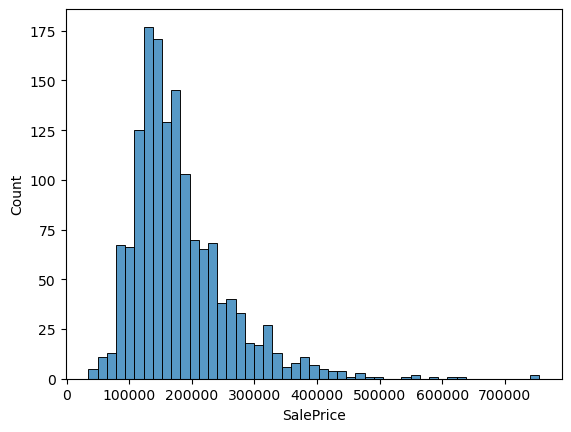

In [17]:
#Univariate analysis on dependent variable
sns.histplot(x=df['SalePrice'])

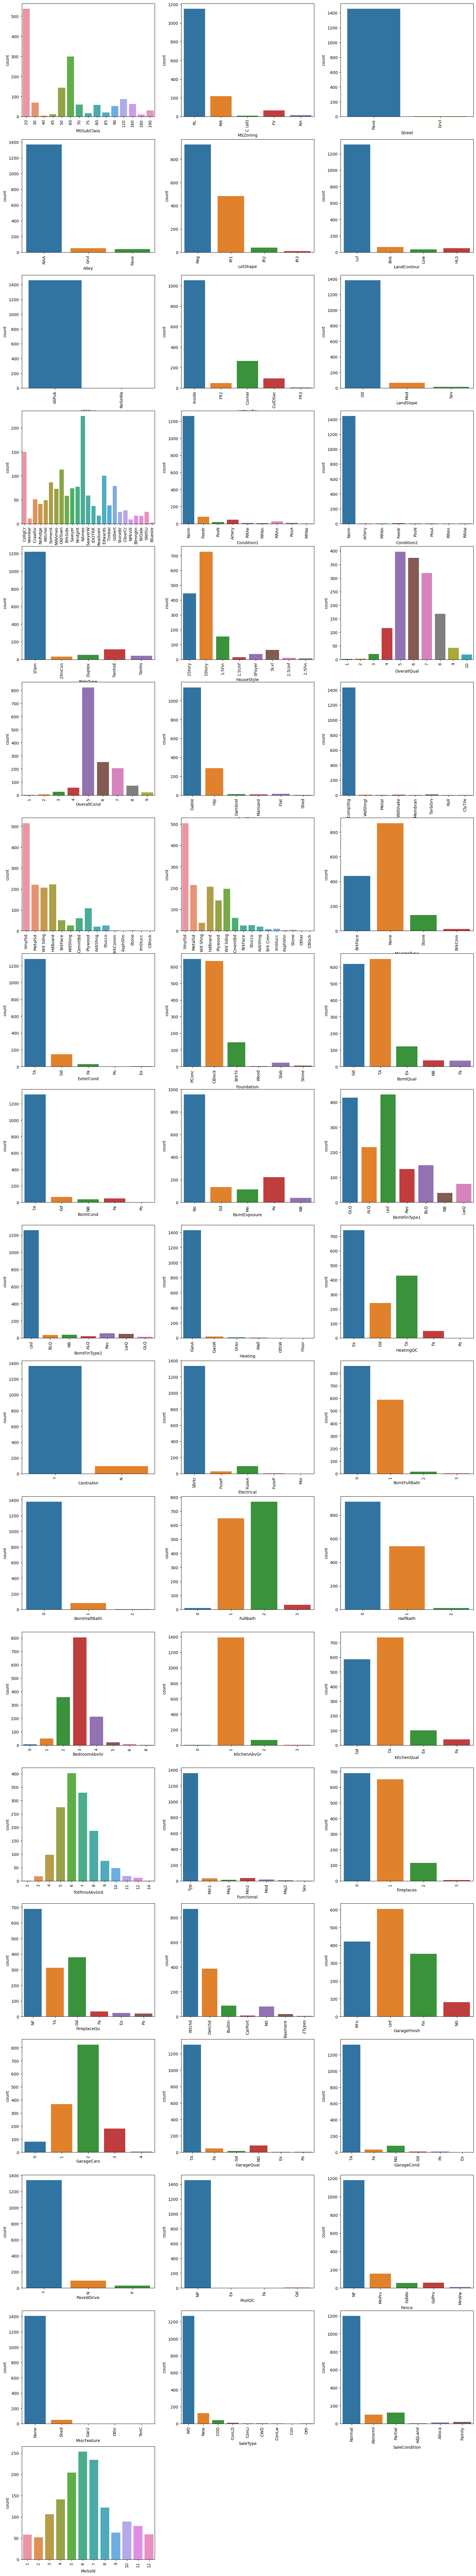

In [18]:
#Univariate analysis for categorical variables 

cat_cols=["MSSubClass","MSZoning","Street","Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", 
          "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
          "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterCond", "Foundation", "BsmtQual", "BsmtCond",
         "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "BsmtFullBath",
         "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", "TotRmsAbvGrd", "Functional",
         "Fireplaces", "FireplaceQu", "GarageType", "GarageFinish", "GarageCars", "GarageQual", "GarageCond", "PavedDrive", 
          "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition", "MoSold"]

plt.figure(figsize=(20, 120))
count = 1
for i in cat_cols:
    plt.subplot(20,3,count)
    plt.xticks(rotation=90)
    sns.countplot(x=df[i])
    count += 1

plt.show()
    

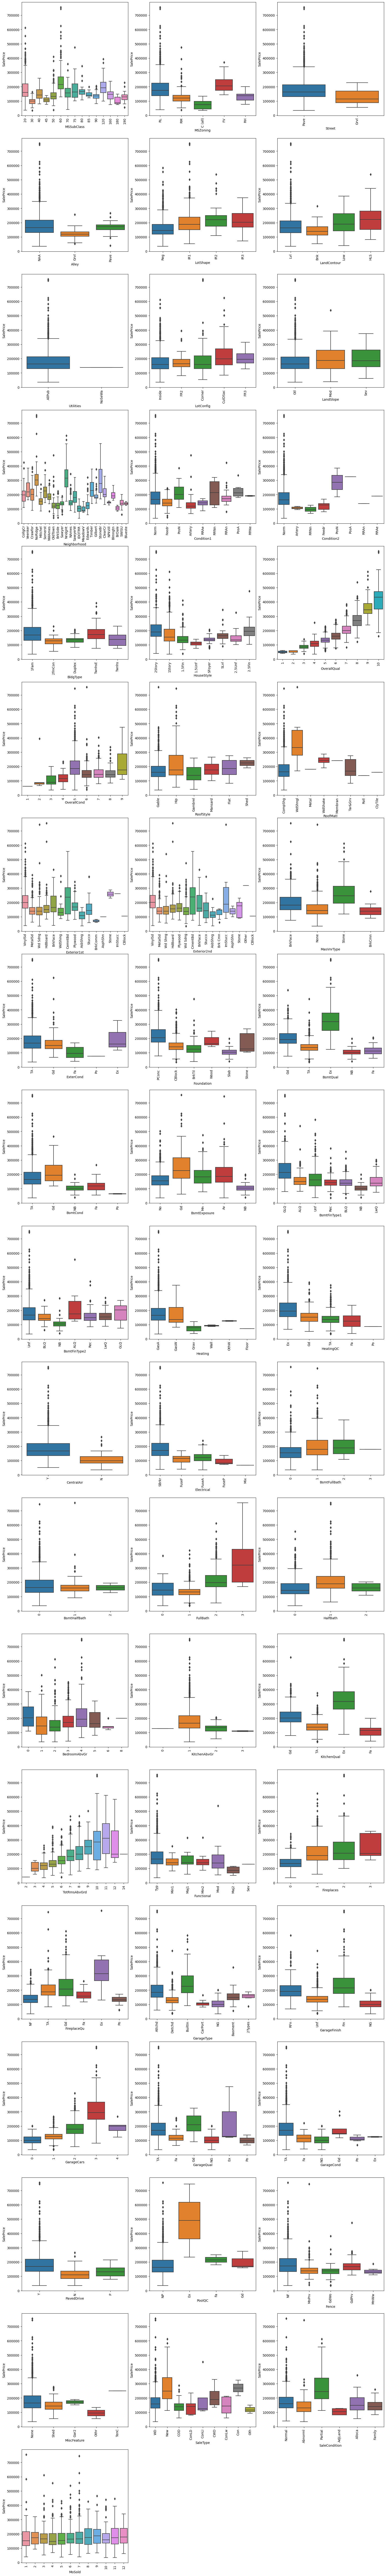

In [19]:
#Box plots for categorical variables.=


plt.figure(figsize=(20, 150))
count = 1
for i in cat_cols:
    plt.subplot(20,3,count)
    plt.xticks(rotation=90)
    sns.boxplot(x = i, y = 'SalePrice', data = df)
    count += 1

plt.show()

# From Univariate and Bivariate analysis, most variables are potentially impacting SalesPrice. It would be tricky to 
# eliminate the features directly 

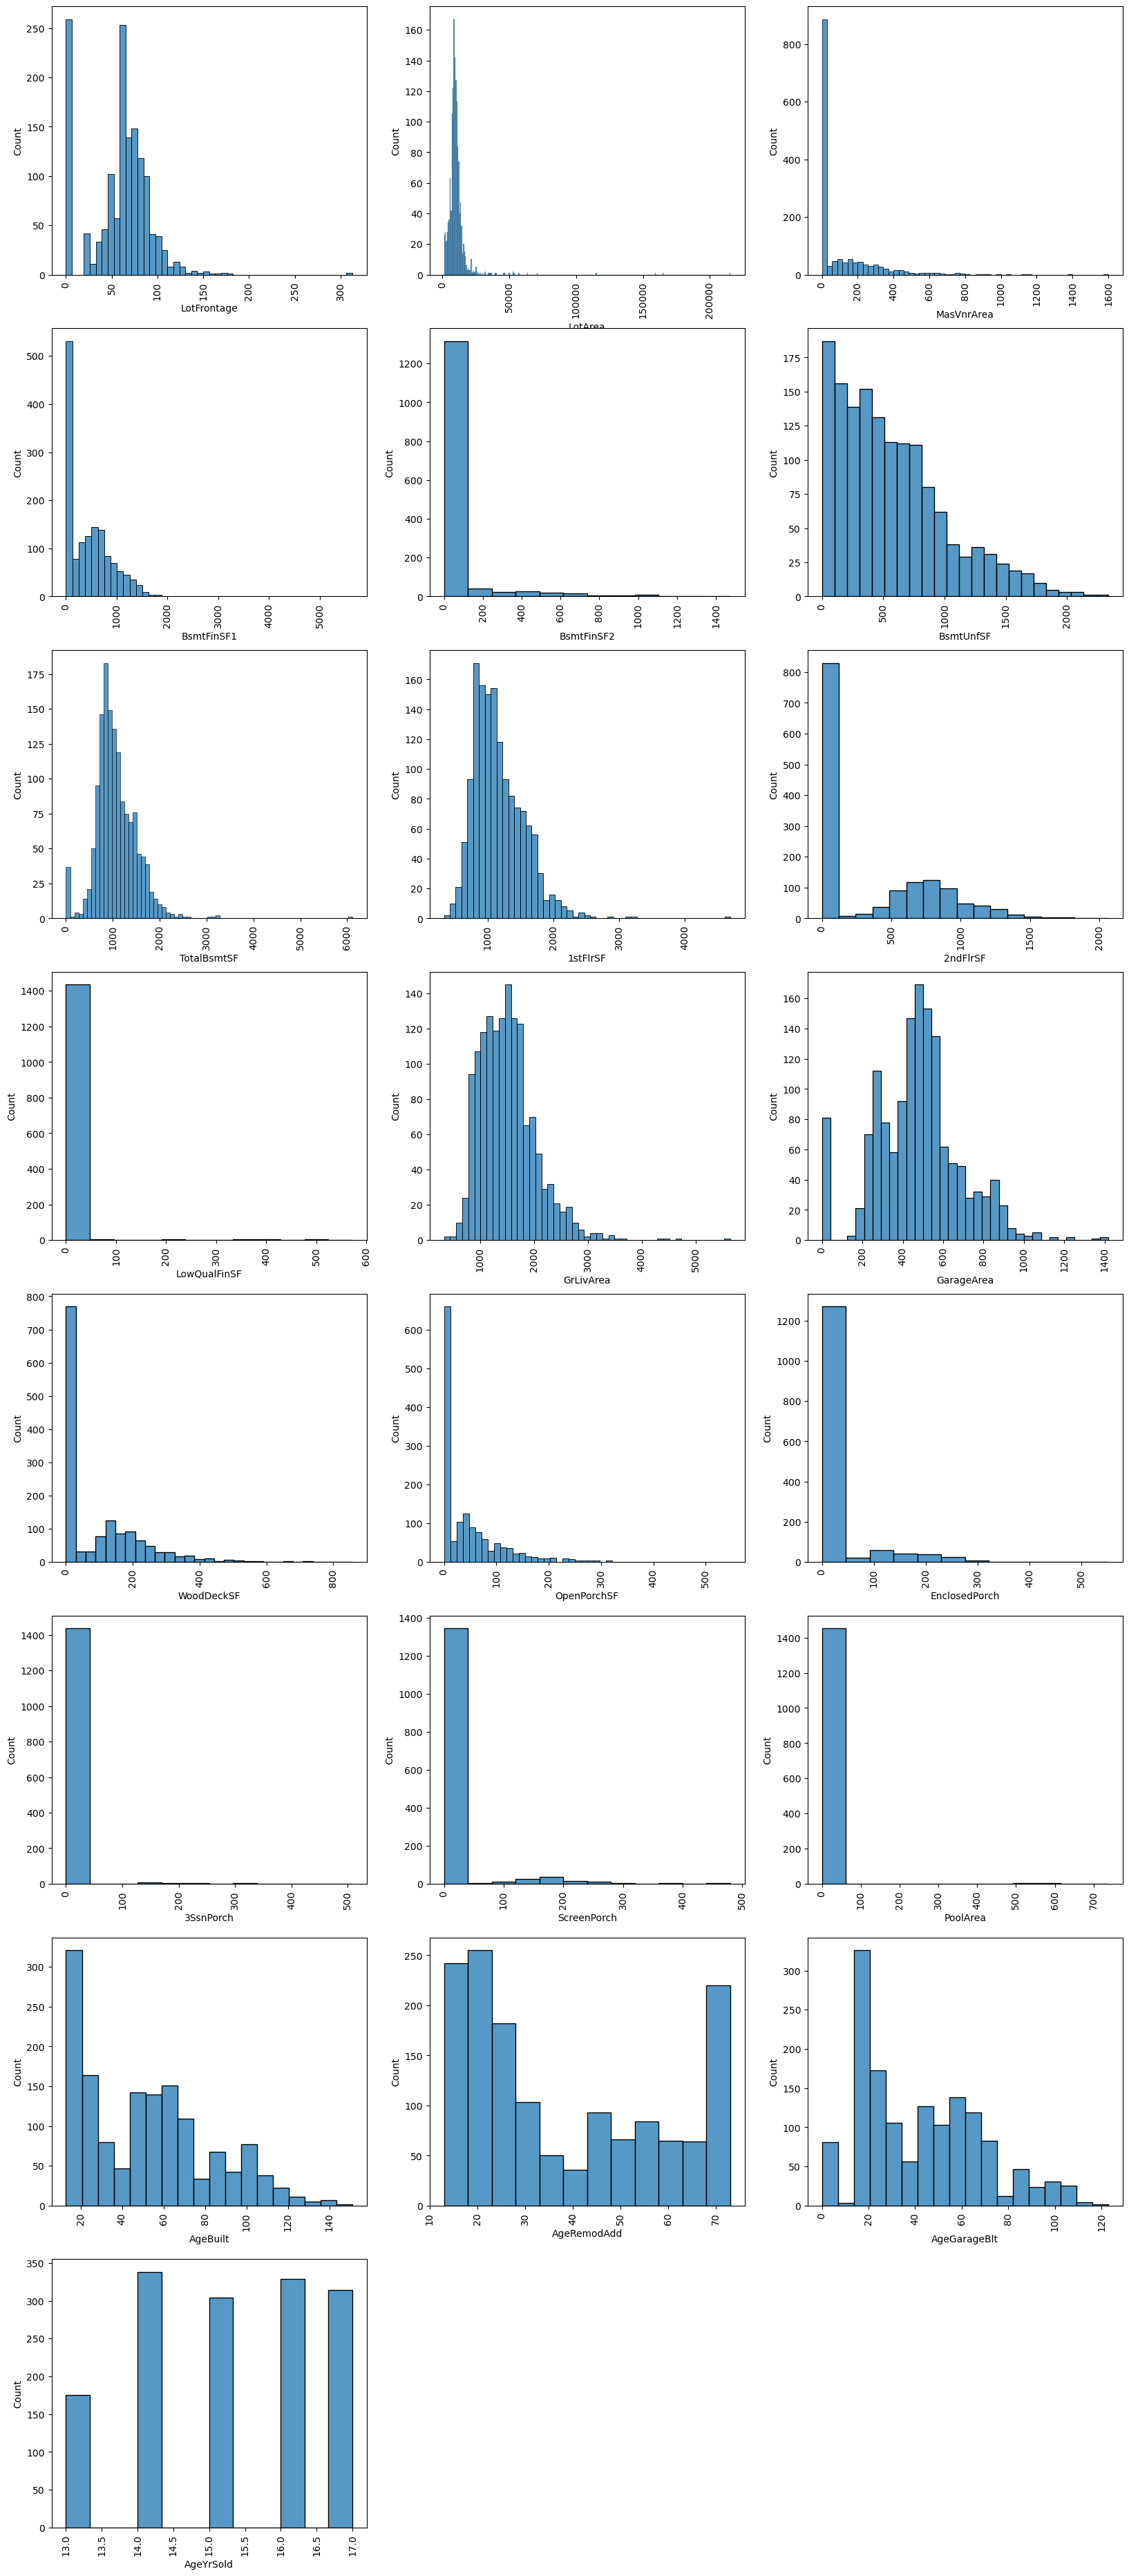

In [20]:
#Univariate analysis for continuous variables 

cont_cols=["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
          "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
          "ScreenPorch", "PoolArea", "AgeBuilt", "AgeRemodAdd", "AgeGarageBlt", "AgeYrSold"]

plt.figure(figsize=(20, 120))
count = 1
for i in cont_cols:
    plt.subplot(20,3,count)
    plt.xticks(rotation=90)
    sns.histplot(x=df[i])
    count += 1

plt.show()

<Figure size 2000x12000 with 0 Axes>

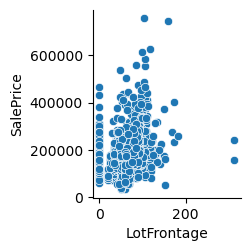

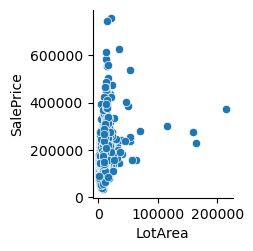

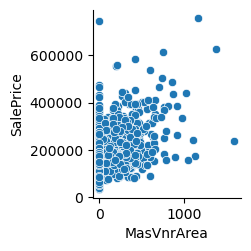

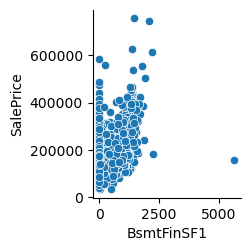

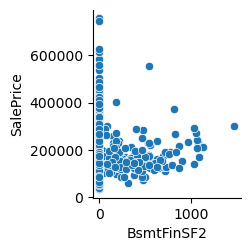

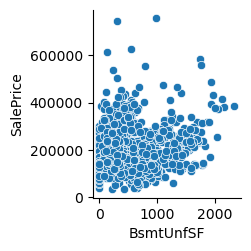

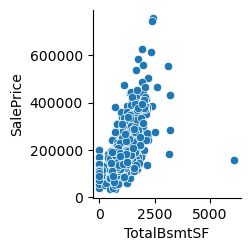

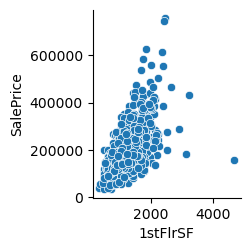

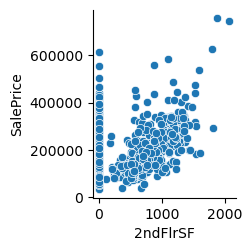

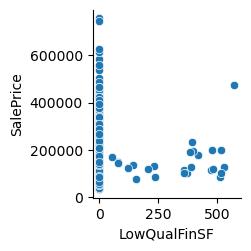

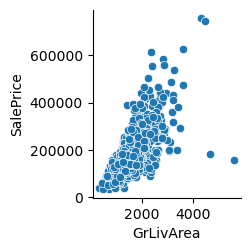

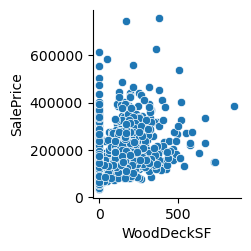

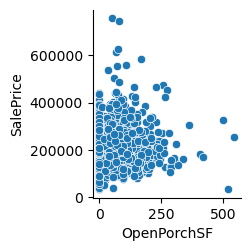

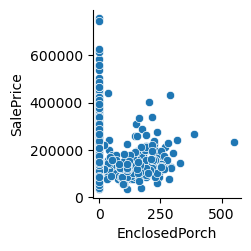

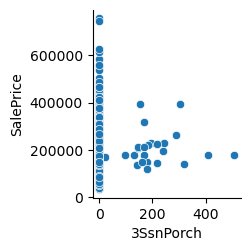

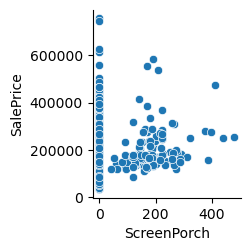

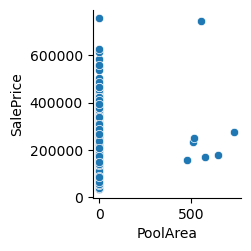

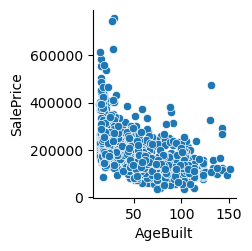

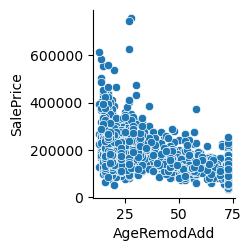

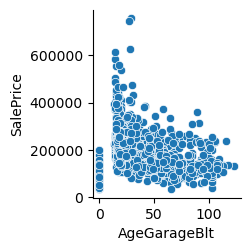

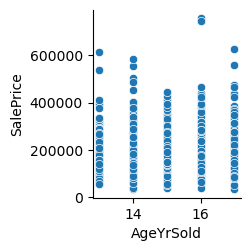

In [21]:
#Bivariate analysis for continuous variables 

plt.figure(figsize=(20, 120))
sns.pairplot(df, x_vars='LotFrontage', y_vars='SalePrice')
sns.pairplot(df, x_vars='LotArea', y_vars='SalePrice') 
sns.pairplot(df, x_vars='MasVnrArea', y_vars='SalePrice')
sns.pairplot(df, x_vars='BsmtFinSF1', y_vars='SalePrice')
sns.pairplot(df, x_vars='BsmtFinSF2', y_vars='SalePrice')
sns.pairplot(df, x_vars='BsmtUnfSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='TotalBsmtSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='1stFlrSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='2ndFlrSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='LowQualFinSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='GrLivArea', y_vars='SalePrice')
sns.pairplot(df, x_vars='WoodDeckSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='OpenPorchSF', y_vars='SalePrice')
sns.pairplot(df, x_vars='EnclosedPorch', y_vars='SalePrice')
sns.pairplot(df, x_vars='3SsnPorch', y_vars='SalePrice')
sns.pairplot(df, x_vars='ScreenPorch', y_vars='SalePrice')
sns.pairplot(df, x_vars='PoolArea', y_vars='SalePrice')
sns.pairplot(df, x_vars='AgeBuilt', y_vars='SalePrice')
sns.pairplot(df, x_vars='AgeRemodAdd', y_vars='SalePrice')
sns.pairplot(df, x_vars='AgeGarageBlt', y_vars='SalePrice')
sns.pairplot(df, x_vars='AgeYrSold', y_vars='SalePrice')

plt.show()

#There is somewhat linear relationship between SalePrices and other independent variables. None of the variable can 
# be eliminated

In [22]:
#drop some of the redundant columns

df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1, inplace = True)

In [23]:
#Create new variables based on Condition 1 and Condition 2 columns. This variables cannot be used as is.

df['Artery1'] = df.Condition1.apply(lambda x: 1 if x == 'Artery' else 0)
df['Artery2'] = df.Condition2.apply(lambda x: 1 if x == 'Artery' else 0)
df['Artery'] = df['Artery1'] | df['Artery2']
print (df['Artery'].value_counts())

df['Feedr1'] = df.Condition1.apply(lambda x: 1 if x == 'Feedr' else 0)
df['Feedr2'] = df.Condition2.apply(lambda x: 1 if x == 'Feedr' else 0)
df['Feedr'] = df['Feedr1'] | df['Feedr2']
print (df['Feedr'].value_counts())

df['Normal1'] = df.Condition1.apply(lambda x: 1 if x == 'Norm' else 0)
df['Normal2'] = df.Condition2.apply(lambda x: 1 if x == 'Norm' else 0)
df['Normal'] = df['Normal1'] | df['Normal2']
print (df['Normal'].value_counts())

df['RRNn1'] = df.Condition1.apply(lambda x: 1 if x == 'RRNn' else 0)
df['RRNn2'] = df.Condition2.apply(lambda x: 1 if x == 'RRNn' else 0)
df['RRNn'] = df['RRNn1'] | df['RRNn2']
print (df['RRNn'].value_counts())

df['RRAn1'] = df.Condition1.apply(lambda x: 1 if x == 'RRAn' else 0)
df['RRAn2'] = df.Condition2.apply(lambda x: 1 if x == 'RRAn' else 0)
df['RRAn'] = df['RRAn1'] | df['RRAn2']
print (df['RRAn'].value_counts())

df['PosN1'] = df.Condition1.apply(lambda x: 1 if x == 'PosN' else 0)
df['PosN2'] = df.Condition2.apply(lambda x: 1 if x == 'PosN' else 0)
df['PosN'] = df['PosN1'] | df['PosN2']
print (df['PosN'].value_counts())

df['PosA1'] = df.Condition1.apply(lambda x: 1 if x == 'PosA' else 0)
df['PosA2'] = df.Condition2.apply(lambda x: 1 if x == 'PosA' else 0)
df['PosA'] = df['PosA1'] | df['PosA2']
print (df['PosA'].value_counts())

df['RRNe1'] = df.Condition1.apply(lambda x: 1 if x == 'RRNe' else 0)
df['RRNe2'] = df.Condition2.apply(lambda x: 1 if x == 'RRNe' else 0)
df['RRNe'] = df['RRNe1'] | df['RRNe2']
print (df['RRNe'].value_counts())

df['RRAe1'] = df.Condition1.apply(lambda x: 1 if x == 'RRAe' else 0)
df['RRAe2'] = df.Condition2.apply(lambda x: 1 if x == 'RRAe' else 0)
df['RRAe'] = df['RRAe1'] | df['RRAe2']
print (df['RRAe'].value_counts())
       
df.drop(['Artery1', 'Artery2', 'Feedr1', 'Feedr2', "Normal1", "Normal2", "RRNn1", "RRNn2", "RRAn1", "RRAn2", "PosN1",
        "PosN2", "PosA1", "PosA2", "RRNe1", "RRNe2", "RRAe1", "RRAe2", "Condition1", "Condition2"], 
        axis = 1, inplace = True)

0    1412
1      48
Name: Artery, dtype: int64
0    1374
1      86
Name: Feedr, dtype: int64
1    1445
0      15
Name: Normal, dtype: int64
0    1453
1       7
Name: RRNn, dtype: int64
0    1433
1      27
Name: RRAn, dtype: int64
0    1441
1      19
Name: PosN, dtype: int64
0    1451
1       9
Name: PosA, dtype: int64
0    1458
1       2
Name: RRNe, dtype: int64
0    1448
1      12
Name: RRAe, dtype: int64


In [24]:
#Misc Feature
# Just considering Shed since other features just appear once or twice in the data.

df['Shed'] = df.MiscFeature.apply(lambda x: 1 if x == 'Shed' else 0)
df.drop(['MiscFeature', 'MiscVal'], axis = 1, inplace = True)

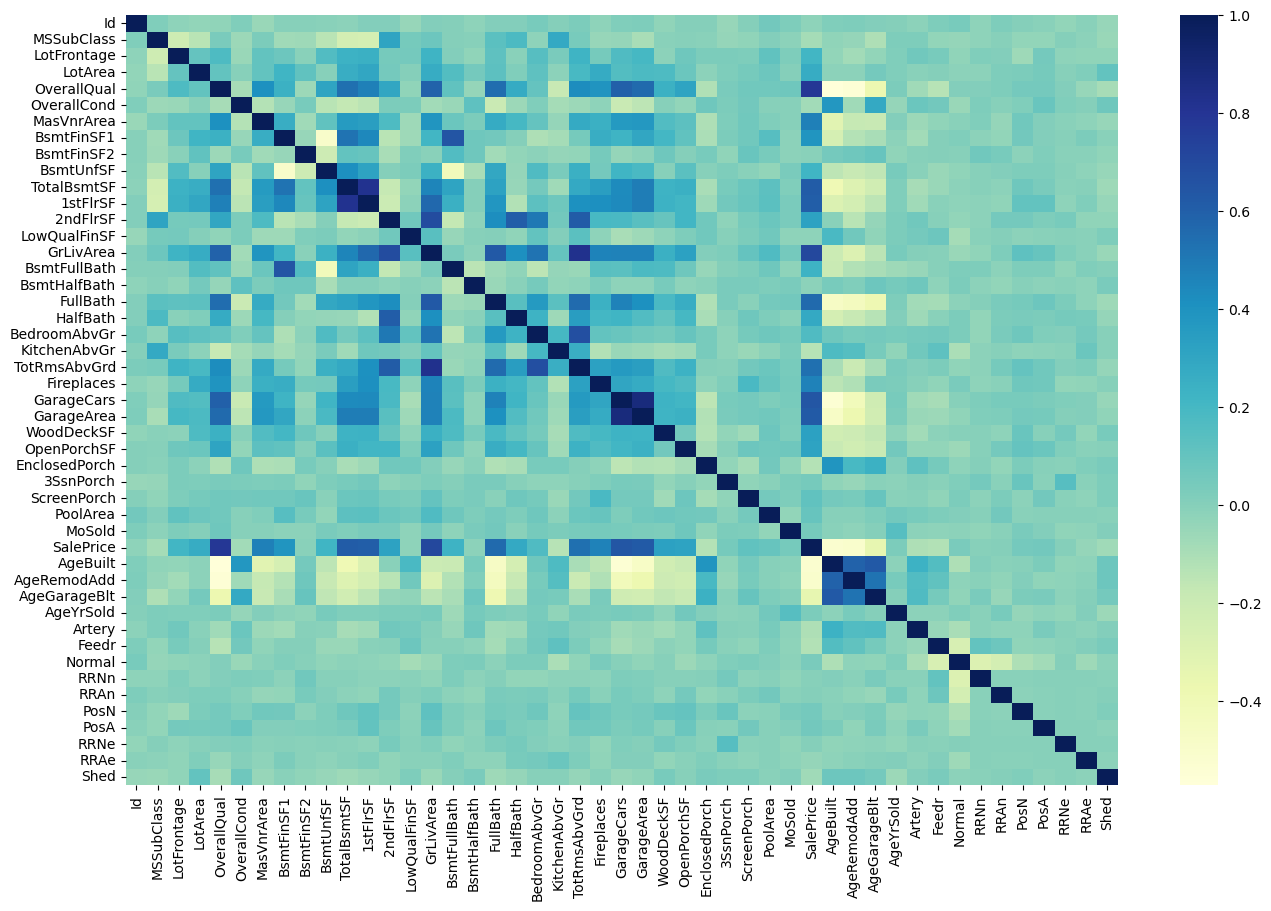

In [25]:
# Checking for Multicollinearity
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = False, cmap="YlGnBu")
plt.show()

# Sales price has positive correlation with OverallQual. TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea/GarageCards 
# Sales price has negative correlation with AgeBuild, AgeRemodAdd and AgeGarageBlt 
# There are some correlations between independent variables. Multicollinearity needs to be addressed

### 2. Data Preparation

In [26]:
# split into X and y
# Remove Id column since it is just an index

X = df.drop(['SalePrice', 'Id'], axis = 1)

y = df['SalePrice']

In [27]:
#Convert all categorical variables into objects

X['MSSubClass'] = X['MSSubClass'].astype('object')
X['OverallQual'] = X['OverallQual'].astype('object')
X['OverallCond'] = X['OverallCond'].astype('object')
X['BsmtFullBath'] = X['BsmtFullBath'].astype('object')
X['BsmtHalfBath'] = X['BsmtHalfBath'].astype('object')
X['FullBath'] = X['FullBath'].astype('object')
X['HalfBath'] = X['HalfBath'].astype('object')
X['BedroomAbvGr'] = X['BedroomAbvGr'].astype('object')
X['KitchenAbvGr'] = X['KitchenAbvGr'].astype('object')
X['TotRmsAbvGrd'] = X['TotRmsAbvGrd'].astype('object')
X['Fireplaces'] = X['Fireplaces'].astype('object')
X['GarageCars'] = X['GarageCars'].astype('object')
X['MoSold'] = X['MoSold'].astype('object')


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [29]:
# Create into dummies and remove specific column
dummies_BsmtQual = pd.get_dummies(df['BsmtQual'],prefix="BsmtQual")
dummies_BsmtQual.drop(['BsmtQual_NB'], axis = 1, inplace = True)

dummies_BsmtCond = pd.get_dummies(df['BsmtCond'],prefix="BsmtCond")
dummies_BsmtCond.drop(['BsmtCond_NB'], axis = 1, inplace = True)

dummies_BsmtExposure = pd.get_dummies(df['BsmtExposure'],prefix="BsmtExposure")
dummies_BsmtExposure.drop(['BsmtExposure_NB'], axis = 1, inplace = True)

dummies_BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'],prefix="BsmtFinType1")
dummies_BsmtFinType1.drop(['BsmtFinType1_NB'], axis = 1, inplace = True)

dummies_BsmtFinType2 = pd.get_dummies(df['BsmtFinType2'],prefix="BsmtFinType2")
dummies_BsmtFinType2.drop(['BsmtFinType2_NB'], axis = 1, inplace = True)

dummies_GarageType = pd.get_dummies(df['GarageType'],prefix="GarageType")
dummies_GarageType.drop(['GarageType_NG'], axis = 1, inplace = True)

dummies_GarageFinish = pd.get_dummies(df['GarageFinish'],prefix="GarageFinish")
dummies_GarageFinish.drop(['GarageFinish_NG'], axis = 1, inplace = True)

dummies_GarageQual = pd.get_dummies(df['GarageQual'],prefix="GarageQual")
dummies_GarageQual.drop(['GarageQual_NG'], axis = 1, inplace = True)

dummies_GarageCond = pd.get_dummies(df['GarageCond'],prefix="GarageCond")
dummies_GarageCond.drop(['GarageCond_NG'], axis = 1, inplace = True)

dummies_PoolQC = pd.get_dummies(df['PoolQC'],prefix="PoolQC")
dummies_PoolQC.drop(['PoolQC_NP'], axis = 1, inplace = True)

dummies_FireplaceQu = pd.get_dummies(df['FireplaceQu'],prefix="FireplaceQu")
dummies_FireplaceQu.drop(['FireplaceQu_NF'], axis = 1, inplace = True)

dummies_Fence = pd.get_dummies(df['Fence'],prefix="Fence")
dummies_Fence.drop(['Fence_NF'], axis = 1, inplace = True)

dummies_Alley = pd.get_dummies(df['Alley'],prefix="Alley")
dummies_Alley.drop(['Alley_NAA'], axis = 1, inplace = True)

dummies_MasVnrType = pd.get_dummies(df['MasVnrType'],prefix="MasVnrType")
dummies_MasVnrType.drop(['MasVnrType_None'], axis = 1, inplace = True)


In [30]:
X = pd.concat([X, dummies_BsmtQual, dummies_BsmtCond, dummies_BsmtExposure, dummies_BsmtFinType1, dummies_BsmtFinType2,
              dummies_GarageType, dummies_GarageFinish, dummies_GarageQual, dummies_GarageCond, dummies_PoolQC, 
              dummies_FireplaceQu, dummies_Fence, dummies_Alley, dummies_MasVnrType], axis=1)

X.drop(['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'FireplaceQu', 'Fence', 'Alley', 'MasVnrType'], axis = 1, inplace = True)
X.shape

(1460, 131)

In [31]:
# create dummy variables for remaining categorical variables

house_cat = X.select_dtypes(include=['object'])
house_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,PavedDrive,MoSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,...,1,Gd,8,Typ,0,2,Y,2,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,1Fam,...,1,TA,6,Typ,1,2,Y,5,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,...,1,Gd,6,Typ,1,2,Y,9,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,1Fam,...,1,Gd,7,Typ,1,3,Y,2,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,1Fam,...,1,Gd,9,Typ,1,3,Y,12,WD,Normal


In [32]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_cat, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)
X.shape

(1460, 355)

In [34]:
# drop categorical variables 
X = X.drop(list(house_cat.columns), axis=1)
X.shape

(1460, 316)

In [35]:
for col in X.columns:
    print(col)

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
AgeBuilt
AgeRemodAdd
AgeGarageBlt
AgeYrSold
Artery
Feedr
Normal
RRNn
RRAn
PosN
PosA
RRNe
RRAe
Shed
BsmtQual_Ex
BsmtQual_Fa
BsmtQual_Gd
BsmtQual_TA
BsmtCond_Fa
BsmtCond_Gd
BsmtCond_Po
BsmtCond_TA
BsmtExposure_Av
BsmtExposure_Gd
BsmtExposure_Mn
BsmtExposure_No
BsmtFinType1_ALQ
BsmtFinType1_BLQ
BsmtFinType1_GLQ
BsmtFinType1_LwQ
BsmtFinType1_Rec
BsmtFinType1_Unf
BsmtFinType2_ALQ
BsmtFinType2_BLQ
BsmtFinType2_GLQ
BsmtFinType2_LwQ
BsmtFinType2_Rec
BsmtFinType2_Unf
GarageType_2Types
GarageType_Attchd
GarageType_Basment
GarageType_BuiltIn
GarageType_CarPort
GarageType_Detchd
GarageFinish_Fin
GarageFinish_RFn
GarageFinish_Unf
GarageQual_Ex
GarageQual_Fa
GarageQual_Gd
GarageQual_Po
GarageQual_TA
GarageCond_Ex
GarageCond_Fa
GarageCond_Gd
GarageCond_Po
GarageCond_TA
PoolQC_Ex
PoolQC_Fa
PoolQC_Gd
FireplaceQ

In [36]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size= 0.7,
                                                    test_size = 0.3, random_state=100)

In [37]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
# cont_cols variables arlready created above
X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
X_train[cont_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeYrSold
210,0.214058,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,...,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.615942,1.000000,0.000000,0.50
318,0.287540,0.039403,0.16,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,...,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.123188,0.283333,0.243902,0.25
239,0.166134,0.033981,0.00,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,...,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.471014,1.000000,0.601626,0.00
986,0.188498,0.017931,0.00,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,...,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.724638,0.116667,0.593496,1.00
1416,0.191693,0.046139,0.00,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.0,...,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.905797,1.000000,0.422764,0.00


### 3. Model Building and Evaluation

In [38]:
# Define RFE function

def estimateRFE(xtrain, ytrain, features):
    estimator=LinearRegression()
    selector=RFE(estimator,n_features_to_select=features)
    selector=selector.fit(xtrain,ytrain)
    selected_features=xtrain.columns[selector.support_]
    print (selected_features)

In [39]:
# Check on the 50 most important features.

estimateRFE(X_train, y_train, 50)


Index(['1stFlrSF', '2ndFlrSF', 'PoolArea', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageCond_Ex',
       'GarageCond_Fa', 'GarageCond_Po', 'GarageCond_TA', 'PoolQC_Ex',
       'PoolQC_Fa', 'PoolQC_Gd', 'BldgType_Duplex', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BedroomAbvGr_8', 'KitchenAbvGr_1',
       'KitchenAbvGr_3', 'TotRmsAbvGrd_14', 'GarageCars_1', 'GarageCars_3',
       'GarageCars_4', 'SaleCondition_Partial'],
      dtype='object')


In [40]:
# Define regression function
def calculateRegression(xtrain, ytrain):
    x_train_lm = sm.add_constant(xtrain)
    lr = sm.OLS(ytrain, x_train_lm).fit()
    print(lr.summary())

In [41]:
# Define VIF function
def calculateVIF(xtrain):
    vif = pd.DataFrame()
    vif['Features'] = xtrain.columns
    vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print (vif)

In [42]:
# Round 1 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     43.27
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:31   Log-Likelihood:                -11478.
No. Observations:                1021   AIC:                         2.354e+04
Df Residuals:                     728   BIC:                         2.499e+04
Df Model:                         292                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.174e+

In [43]:
# Remove many of the basement variables based on RFE and p-value

X_train.drop(['BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 
         'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_ALQ',
         'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf'], 
          axis = 1, inplace = True)

In [44]:
# Round 2 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     44.75
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:31   Log-Likelihood:                -11497.
No. Observations:                1021   AIC:                         2.355e+04
Df Residuals:                     743   BIC:                         2.492e+04
Df Model:                         277                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.118e+

In [45]:
# Remove all except MoSold_10 since it has a low p-value

X_train.drop(['MoSold_2', 'MoSold_3', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8', 
              'MoSold_11', 'MoSold_12', 'MoSold_9'], axis = 1, inplace = True)

In [46]:
# Round 3 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     46.33
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11504.
No. Observations:                1021   AIC:                         2.354e+04
Df Residuals:                     753   BIC:                         2.487e+04
Df Model:                         267                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.164e+

In [47]:
# Removing the exterior material since p-values are high

X_train.drop(['Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 
              'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 
              'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stone', 'Exterior1st_Stucco',
              'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'], axis = 1, inplace = True)

X_train.drop(['Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 
              'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 
              'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
              'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Exterior2nd_Other'], axis = 1, inplace = True)

In [48]:
# Round 4 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     51.11
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11523.
No. Observations:                1021   AIC:                         2.353e+04
Df Residuals:                     779   BIC:                         2.472e+04
Df Model:                         241                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.94e+

In [49]:
# Remove all neighborhoods other than Neighborhood_NoRidge and Neighborhood_Crawfor due to high p-values

X_train.drop(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 
              'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 
              'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
              'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
              'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
              'Neighborhood_Timber', 'Neighborhood_Veenker'], axis = 1, inplace = True)

In [50]:
# Round 5 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     54.26
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11553.
No. Observations:                1021   AIC:                         2.355e+04
Df Residuals:                     801   BIC:                         2.463e+04
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.079e+

In [51]:
# Removing more vairiables based on high p-value

X_train.drop(['HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 
              'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'BedroomAbvGr_1', 
              'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_5',
              'BedroomAbvGr_6', 'BedroomAbvGr_8', 'Electrical_FuseF', 'Electrical_FuseP',
              'Electrical_Mix', 'Electrical_SBrkr', 'Heating_GasA', 'Heating_GasW',
              'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd',
              'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y'], axis = 1, inplace = True)

In [52]:
# Round 6 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     61.55
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11569.
No. Observations:                1021   AIC:                         2.353e+04
Df Residuals:                     827   BIC:                         2.448e+04
Df Model:                         193                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.014e+

In [53]:
# Removing more vairiables based on high p-value

X_train.drop(['LotFrontage', 'AgeRemodAdd', 'AgeGarageBlt', 'AgeYrSold', 
              'Shed', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 
              'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
              'GarageFinish_Unf', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv',
              'Fence_MnWw', 'Alley_Grvl', 'Alley_Pave', 'MasVnrType_BrkCmn',
              'MasVnrType_BrkFace', 'MasVnrType_Stone'], axis = 1, inplace = True)

In [54]:
# Round 7 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     69.51
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11574.
No. Observations:                1021   AIC:                         2.350e+04
Df Residuals:                     847   BIC:                         2.435e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.966e+

In [55]:
# Removing more variables based on high p-value

X_train.drop(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 
              'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 
              'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
              'MSSubClass_180', 'MSSubClass_190', 'Foundation_CBlock', 'Foundation_PConc',
              'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'PavedDrive_P',
              'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
               'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family'], 
                 axis = 1, inplace = True)

In [56]:
# Round 7 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     83.47
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11587.
No. Observations:                1021   AIC:                         2.347e+04
Df Residuals:                     875   BIC:                         2.419e+04
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.983e+

In [57]:
# Removing more variables based on high p-value

X_train.drop(['ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 
              'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 
              'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Po', 'FireplaceQu_TA',
              'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA',
              'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Po', 'GarageCond_TA'], 
                 axis = 1, inplace = True)

In [58]:
# Round 8 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     92.37
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:32   Log-Likelihood:                -11594.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     889   BIC:                         2.410e+04
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.923e+

In [59]:
# Removing more variables based on high p-value

X_train.drop(['BsmtUnfSF', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch', 
              'ScreenPorch', 'PosA', 'RRNe', 'LotShape_Reg', 'LandContour_HLS',
              'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
              'BldgType_2fmCon', 'BldgType_Duplex', 'BsmtFullBath_3', 'BsmtHalfBath_1',
              'BsmtHalfBath_2'], axis = 1, inplace = True)

In [60]:
# Round 9 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     105.1
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                -11603.
No. Observations:                1021   AIC:                         2.344e+04
Df Residuals:                     905   BIC:                         2.401e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.811e+

In [61]:
# Removing more variables based on high p-value

X_train.drop(['GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 
              'Fireplaces_1', 'Fireplaces_3', 'FireplaceQu_Gd', 'BsmtQual_Ex', 'BsmtQual_Fa',
              'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_TA', 'MSZoning_FV', 'MSZoning_RH',
              'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'LandSlope_Sev', 'RoofStyle_Gable',
              'RoofStyle_Gambrel', 'RoofStyle_Hip','RoofStyle_Mansard','HalfBath_1', 'FullBath_1'], axis = 1, inplace = True)

In [62]:
# Round 10 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                -11630.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     928   BIC:                         2.390e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.837e+

In [63]:
# Removing more variables based on high p-value

X_train.drop(['BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'RRNn', 'LotShape_IR2',
              'LotShape_IR3', 'OverallQual_8', 'OverallCond_2', 'OverallCond_8', 'OverallCond_9',
              'RoofStyle_Shed', 'FullBath_2', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14',
              'Functional_Maj2'], axis = 1, inplace = True)

In [64]:
# Round 11 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                -11647.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     941   BIC:                         2.385e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.817e+

In [65]:
# Removing more variables based on high p-value

X_train.drop(['Feedr', 'RRAn', 'BldgType_TwnhsE', 'OverallCond_7', 'BsmtFullBath_1', 'HalfBath_2',
              'KitchenAbvGr_3', 'Functional_Min1', 'Functional_Mod', 'Functional_Sev', 'SaleType_Con'], 
              axis = 1, inplace = True)

In [66]:
# Round 12 of regression
calculateRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                -11667.
No. Observations:                1021   AIC:                         2.347e+04
Df Residuals:                     951   BIC:                         2.382e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.094e+

In [67]:
# Removing more variables based on high p-value

X_train.drop(['KitchenAbvGr_1', 'KitchenAbvGr_2', 'Functional_Min2'], 
              axis = 1, inplace = True)

In [68]:
# Round 13 of regression 
calculateRegression(X_train, y_train)
# Check multicollinearity
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     160.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                -11690.
No. Observations:                1021   AIC:                         2.351e+04
Df Residuals:                     954   BIC:                         2.384e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.324e+

In [69]:
# Removing more variables based on high p-value and high VIF

X_train.drop(['SaleCondition_Partial', 'SaleType_New', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolArea',
              'RoofMatl_CompShg','BsmtFullBath_2'], 
              axis = 1, inplace = True)

In [70]:
# Round 14 of regression
calculateRegression(X_train, y_train)
# Check multicollinearity
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                -11929.
No. Observations:                1021   AIC:                         2.398e+04
Df Residuals:                     960   BIC:                         2.428e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.484e+05 

In [71]:
# Removing more variables based on high p-value and high VIF

X_train.drop(['Street_Pave', 'Normal', 'KitchenQual_TA', 'Functional_Typ', 'TotalBsmtSF', 'RoofMatl_Membran',
             'RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv'], 
              axis = 1, inplace = True)

In [72]:
# Round 15 of regression
calculateRegression(X_train, y_train)
# Check multicollinearity
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     113.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:34   Log-Likelihood:                -11971.
No. Observations:                1021   AIC:                         2.405e+04
Df Residuals:                     969   BIC:                         2.430e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.108e+05 

In [73]:
# Removing more variables based on high p-value and high VIF

X_train.drop(['LandContour_Lvl', 'GarageQual_Gd', 'SaleCondition_Normal', 'KitchenQual_Fa', 'KitchenQual_Gd', 
              'RoofMatl_WdShake'], axis = 1, inplace = True)

In [74]:
# Round 16 of regression
calculateRegression(X_train, y_train)
# Check multicollinearity
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     127.0
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:34   Log-Likelihood:                -11980.
No. Observations:                1021   AIC:                         2.405e+04
Df Residuals:                     975   BIC:                         2.428e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.245e+05 

In [75]:
# Removing more variables based on high p-value and high VIF

X_train.drop(['LandSlope_Mod', 'GarageCond_Gd', 'PosN', 'MasVnrArea', 'MoSold_10', 'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9',
             'TotRmsAbvGrd_3', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_4','TotRmsAbvGrd_5','GarageType_2Types'], 
             axis = 1, inplace = True)

In [76]:
# Round 17 of regression
calculateRegression(X_train, y_train)
# Check multicollinearity
calculateVIF(X_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:57:34   Log-Likelihood:                -11993.
No. Observations:                1021   AIC:                         2.405e+04
Df Residuals:                     988   BIC:                         2.422e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.036e+05 

In [77]:
### Evaluate against testing data
# apply scaler() to all the numeric columns 
# cont_cols variables already created above
X_test[cont_cols] = scaler.transform(X_test[cont_cols])
X_test[cont_cols].head()

## Drop the required columns

X_test.drop(['BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 
         'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_ALQ',
         'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf'], 
          axis = 1, inplace = True)

X_test.drop(['MoSold_2', 'MoSold_3', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8', 
              'MoSold_11', 'MoSold_12', 'MoSold_9'], axis = 1, inplace = True)

X_test.drop(['Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 
              'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 
              'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stone', 'Exterior1st_Stucco',
              'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'], axis = 1, inplace = True)

X_test.drop(['Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 
              'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 
              'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
              'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Exterior2nd_Other'], axis = 1, inplace = True)

X_test.drop(['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 
              'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 
              'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
              'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
              'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
              'Neighborhood_Timber', 'Neighborhood_Veenker'], axis = 1, inplace = True)

X_test.drop(['HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 
              'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'BedroomAbvGr_1', 
              'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_5',
              'BedroomAbvGr_6', 'BedroomAbvGr_8', 'Electrical_FuseF', 'Electrical_FuseP',
              'Electrical_Mix', 'Electrical_SBrkr', 'Heating_GasA', 'Heating_GasW',
              'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd',
              'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y'], axis = 1, inplace = True)

X_test.drop(['LotFrontage', 'AgeRemodAdd', 'AgeGarageBlt', 'AgeYrSold', 
              'Shed', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 
              'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
              'GarageFinish_Unf', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv',
              'Fence_MnWw', 'Alley_Grvl', 'Alley_Pave', 'MasVnrType_BrkCmn',
              'MasVnrType_BrkFace', 'MasVnrType_Stone'], axis = 1, inplace = True)

X_test.drop(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 
              'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 
              'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
              'MSSubClass_180', 'MSSubClass_190', 'Foundation_CBlock', 'Foundation_PConc',
              'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'PavedDrive_P',
              'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
               'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family'], 
                 axis = 1, inplace = True)

X_test.drop(['ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 
              'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 
              'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Po', 'FireplaceQu_TA',
              'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA',
              'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Po', 'GarageCond_TA'], 
                 axis = 1, inplace = True)

X_test.drop(['BsmtUnfSF', 'LowQualFinSF', 'OpenPorchSF', 'EnclosedPorch', 
              'ScreenPorch', 'PosA', 'RRNe', 'LotShape_Reg', 'LandContour_HLS',
              'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
              'BldgType_2fmCon', 'BldgType_Duplex', 'BsmtFullBath_3', 'BsmtHalfBath_1',
              'BsmtHalfBath_2'], axis = 1, inplace = True)

X_test.drop(['GarageCars_1', 'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 
              'Fireplaces_1', 'Fireplaces_3', 'FireplaceQu_Gd', 'BsmtQual_Ex', 'BsmtQual_Fa',
              'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_TA', 'MSZoning_FV', 'MSZoning_RH',
              'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa', 'LandSlope_Sev', 'RoofStyle_Gable',
              'RoofStyle_Gambrel', 'RoofStyle_Hip','RoofStyle_Mansard','HalfBath_1', 'FullBath_1'], axis = 1, inplace = True)

X_test.drop(['BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'RRNn', 'LotShape_IR2',
              'LotShape_IR3', 'OverallQual_8', 'OverallCond_2', 'OverallCond_8', 'OverallCond_9',
              'RoofStyle_Shed', 'FullBath_2', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14',
              'Functional_Maj2'], axis = 1, inplace = True)


X_test.drop(['Feedr', 'RRAn', 'BldgType_TwnhsE', 'OverallCond_7', 'BsmtFullBath_1', 'HalfBath_2',
              'KitchenAbvGr_3', 'Functional_Min1', 'Functional_Mod', 'Functional_Sev', 'SaleType_Con'], 
              axis = 1, inplace = True)

X_test.drop(['KitchenAbvGr_1', 'KitchenAbvGr_2', 'Functional_Min2'], 
              axis = 1, inplace = True)

X_test.drop(['SaleCondition_Partial', 'SaleType_New', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolArea',
              'RoofMatl_CompShg','BsmtFullBath_2'], 
              axis = 1, inplace = True)

X_test.drop(['Street_Pave', 'Normal', 'KitchenQual_TA', 'Functional_Typ', 'TotalBsmtSF','RoofMatl_Membran',
             'RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv'], 
              axis = 1, inplace = True)

X_test.drop(['LandContour_Lvl', 'GarageQual_Gd', 'SaleCondition_Normal', 'KitchenQual_Fa', 'KitchenQual_Gd', 
              'RoofMatl_WdShake'], axis = 1, inplace = True)

X_test.drop(['LandSlope_Mod', 'GarageCond_Gd', 'PosN', 'MasVnrArea', 'MoSold_10', 'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9',
             'TotRmsAbvGrd_3', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_4','TotRmsAbvGrd_5', 'GarageType_2Types'], 
                axis = 1, inplace = True)

In [78]:
#Final round of regresion and residual analysis
x_train_lm = sm.add_constant(X_train)
x_test_lm = sm.add_constant(X_test)
lr = sm.OLS(y_train, x_train_lm).fit()

y_pred_train = lr.predict(x_train_lm)
y_pred_test = lr.predict(x_test_lm)

r2_train_lr = r2_score(y_train, y_pred_train)
print ("R2 Training Set = %.3f" % (r2_train_lr))

r2_test_lr = r2_score(y_test, y_pred_test)
print ("R2 Testing Set = %.3f" % (r2_test_lr))

rss_train_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS Training Set = %.3f" % (rss_train_lr))

rss_test_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS Testing Set = %.3f" % (rss_test_lr))

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE Training Set = %.3f" % (mse_train_lr))

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE Testing Set = %.3f" % (mse_test_lr))

R2 Training Set = 0.850
R2 Testing Set = 0.822
RSS Training Set = 953987497668.724
RSS Testing Set = 501180294851.619
MSE Training Set = 934365815.542
MSE Testing Set = 1144247248.520


In [79]:
# OBSERVATION
# The linear regression model though satisfactory from rsquared perspective, it is missing some important predictor variables.
# Eliminating severa variables together may have led to eliminating some important variables. Basically the following are some 
# important variables
# Sqr feet of the house and lot and garage
# Overall condition and Quality - The higher ratings have positve coeff while lower rating have negative coeff
# Extra features like wooden deck, 3 baths, 2 fireplaces, wdshing roof material
# Few good neighborhoods

### 4. Model Building using Ridge and Lasso Regression

In [80]:
# Resplit into train and test for new evaluation
X_train_AR, X_test_AR, y_train_AR, y_test_AR = train_test_split(X, y, 
                                                    train_size= 0.7,
                                                    test_size = 0.3, random_state=100)

In [81]:
# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
# cont_cols variables arlready created above
X_train_AR[cont_cols] = scaler.fit_transform(X_train_AR[cont_cols])
X_train_AR[cont_cols].head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeYrSold
210,0.214058,0.019306,0.00,0.082920,0.0,0.169521,0.141408,0.113889,0.000000,0.0,...,0.000000,0.000000,0.173913,0.0,0.0,0.0,0.615942,1.000000,0.000000,0.50
318,0.287540,0.039403,0.16,0.174876,0.0,0.154110,0.220458,0.231481,0.616949,0.0,...,0.396733,0.114723,0.260870,0.0,0.0,0.0,0.123188,0.283333,0.243902,0.25
239,0.166134,0.033981,0.00,0.016655,0.0,0.274401,0.120295,0.098611,0.333656,0.0,...,0.000000,0.267686,0.000000,0.0,0.0,0.0,0.471014,1.000000,0.601626,0.00
986,0.188498,0.017931,0.00,0.000000,0.0,0.207620,0.079378,0.145602,0.307022,0.0,...,0.459743,0.000000,0.000000,0.0,0.0,0.0,0.724638,0.116667,0.593496,1.00
1416,0.191693,0.046139,0.00,0.000000,0.0,0.332620,0.127169,0.202315,0.505569,0.0,...,0.000000,0.000000,0.206522,0.0,0.0,0.0,0.905797,1.000000,0.422764,0.00


In [82]:
X_test_AR[cont_cols] = scaler.transform(X_test_AR[cont_cols])
X_test_AR[cont_cols].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeYrSold
1436,0.191693,0.035192,0.00000,0.109142,0.0,0.106164,0.141408,0.113889,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.282609,0.650000,0.398374,0.75
57,0.284345,0.047566,0.00000,0.000000,0.0,0.368151,0.140753,0.112963,0.416465,0.0,...,0.000000,0.133843,0.0,0.0,0.0,0.000000,0.043478,0.100000,0.154472,1.00
780,0.201278,0.029930,0.02375,0.000000,0.0,0.529538,0.202455,0.203935,0.000000,0.0,...,0.256709,0.040153,0.0,0.0,0.0,0.000000,0.108696,0.233333,0.227642,0.75
382,0.252396,0.036338,0.00000,0.000000,0.0,0.401969,0.153682,0.131250,0.415496,0.0,...,0.168028,0.101338,0.0,0.0,0.0,0.000000,0.028986,0.066667,0.138211,0.75
1170,0.242812,0.039309,0.00000,0.092488,0.0,0.245719,0.179378,0.172685,0.000000,0.0,...,0.236873,0.000000,0.0,0.0,0.0,0.888889,0.239130,0.550000,0.373984,0.50


In [83]:
params = {'alpha': [ 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_AR, y_train_AR) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 20.0, 50.0,
                                   100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [85]:
#Fitting Ridge model for various values of alpha
alpha = model_cv.best_params_["alpha"]

ridge_list = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)']
df_ridge = pd.DataFrame(ridge_list)

for params_list in params.values():
    for i in params_list:
        metric = []
        ridge = Ridge(alpha=i)

        ridge.fit(X_train_AR, y_train_AR)

        y_pred_train_AR = ridge.predict(X_train_AR)
        y_pred_test_AR = ridge.predict(X_test_AR)

        r2_train_ridge = r2_score(y_train_AR, y_pred_train_AR)
        metric.append("{0:,.3f}".format(r2_train_ridge))

        r2_test_ridge = r2_score(y_test_AR, y_pred_test_AR)
        metric.append("{0:,.3f}".format(r2_test_ridge))

        rss_train_ridge = np.sum(np.square(y_train_AR - y_pred_train_AR))
        metric.append("{0:,.0f}".format(rss_train_ridge))

        rss_test_ridge = np.sum(np.square(y_test_AR - y_pred_test_AR))
        metric.append("{0:,.0f}".format(rss_test_ridge))

        mse_train_ridge = mean_squared_error(y_train_AR, y_pred_train_AR)
        metric.append("{0:,.0f}".format(mse_train_ridge))

        mse_test_ridge = mean_squared_error(y_test_AR, y_pred_test_AR)
        metric.append("{0:,.0f}".format(mse_test_ridge))

        name = 'Ridge Reg @ %.2f' % (i)
        df_ridge[name] = metric

print (df_ridge)

                  0   Ridge Reg @ 0.01   Ridge Reg @ 0.05 Ridge Reg @ 0.10  \
0  R2 Score (Train)              0.944              0.944            0.943   
1   R2 Score (Test)              0.605              0.641            0.687   
2       RSS (Train)    355,586,211,474    358,394,855,256  363,668,093,384   
3        RSS (Test)  1,114,642,608,158  1,012,482,685,192  882,753,562,631   
4       MSE (Train)        348,272,489        351,023,365      356,188,142   
5        MSE (Test)      2,544,846,137      2,311,604,304    2,015,419,093   

  Ridge Reg @ 0.50 Ridge Reg @ 1.00 Ridge Reg @ 10.00 Ridge Reg @ 20.00  \
0            0.936            0.931             0.903             0.890   
1            0.809            0.839             0.860             0.854   
2  407,418,011,497  442,293,578,848   616,909,057,841   703,998,589,170   
3  539,427,667,189  454,499,577,753   394,942,891,888   411,637,065,462   
4      399,038,209      433,196,453       604,220,429       689,518,697   
5  

In [86]:
# Now start with Lasso regression

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_AR, y_train_AR) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 20.0, 50.0,
                                   100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50.0}


In [88]:
#Fitting Lasso model for alpha = 50 and printing coefficients which have been penalised
# alpha = model_cv.best_params_["alpha"]

lasso_list = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)']
df_lasso = pd.DataFrame(lasso_list)

for params_list in params.values():
    for i in params_list:
        metric = []

        lasso = Lasso(alpha=i)

        lasso.fit(X_train_AR, y_train_AR)

        y_pred_train_AR = lasso.predict(X_train_AR)
        y_pred_test_AR = lasso.predict(X_test_AR)

        r2_train_lasso = r2_score(y_train_AR, y_pred_train_AR)
        metric.append("{0:,.3f}".format(r2_train_lasso))

        r2_test_lasso = r2_score(y_test_AR, y_pred_test_AR)
        metric.append("{0:,.3f}".format(r2_test_lasso))

        rss_train_lasso = np.sum(np.square(y_train_AR - y_pred_train_AR))
        metric.append("{0:,.3f}".format(rss_train_lasso))

        rss_test_lasso = np.sum(np.square(y_test_AR - y_pred_test_AR))
        metric.append("{0:,.3f}".format(rss_test_lasso))

        mse_train_lasso = mean_squared_error(y_train_AR, y_pred_train_AR)
        metric.append("{0:,.3f}".format(mse_train_lasso))

        mse_test_lasso = mean_squared_error(y_test_AR, y_pred_test_AR)
        metric.append("{0:,.3f}".format(mse_test_lasso))
        
        name = 'Lasso Reg @ %.2f' % (i)
        df_lasso[name] = metric

print (df_lasso)

                  0     Lasso Reg @ 0.01     Lasso Reg @ 0.05  \
0  R2 Score (Train)                0.945                0.945   
1   R2 Score (Test)                0.680                0.677   
2       RSS (Train)  352,235,891,231.584  352,369,496,445.958   
3        RSS (Test)  903,230,341,247.325  910,244,063,859.151   
4       MSE (Train)      344,991,078.581      345,121,935.794   
5        MSE (Test)    2,062,169,728.875    2,078,182,794.199   

      Lasso Reg @ 0.10       Lasso Reg @ 0.50       Lasso Reg @ 1.00  \
0                0.945                  0.944                  0.944   
1                0.670                  0.603                  0.573   
2  352,546,515,587.913    354,134,608,902.031    355,044,845,055.229   
3  930,047,657,879.521  1,118,253,340,103.141  1,203,974,936,857.207   
4      345,295,313.994        346,850,743.293        347,742,257.645   
5    2,123,396,479.177      2,553,089,817.587      2,748,801,225.701   

       Lasso Reg @ 10.00      Lasso Reg

In [89]:
#Comparing co-efficients of Ridge and Lasso regression at optimal alphas

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

ridge = Ridge(alpha=10)
ridge.fit(X_train_AR, y_train_AR)

lasso = Lasso(alpha=500)
lasso.fit(X_train_AR, y_train_AR)

betas['Ridge @ alpha = 10'] = ridge.coef_
betas['Lasso @ alpha = 500'] = lasso.coef_

pd.set_option('display.max_rows', None)

betas

,Ridge @ alpha = 10,Lasso @ alpha = 500
LotFrontage,156.453253,0.000000
LotArea,12968.155778,0.000000
MasVnrArea,15282.808816,0.000000
BsmtFinSF1,11435.369242,0.000000
BsmtFinSF2,8250.799940,0.000000
BsmtUnfSF,11760.262987,0.000000
TotalBsmtSF,17049.898110,0.000000
1stFlrSF,27425.394820,0.000000
2ndFlrSF,27048.924224,0.000000
LowQualFinSF,-2316.521041,-0.000000


In [90]:
# Based on feature selection of lasso variables, the following are the most important features

betas.sort_values(by='Lasso @ alpha = 500', ascending=False)

# The following variables are important
# The living area above the ground 
# Quality of basement
# Overall Quality and condition
# 3 Car garages, attached garage and garage area
# 1 or 2 fireplaces
# Neighborhood - Northridge, Crawford and Somerset
# 3 full baths
# central airconditioning
# 

# The negative variables are as follows
# Bad Overall Quality and Condition
# Edwards Neighbourhood
# Just 1 full bath
# Twin building
# Ok heating quality
# Houses that were remodelled before a while

,Ridge @ alpha = 10,Lasso @ alpha = 500
GrLivArea,33270.700578,136900.292983
BsmtQual_Ex,24040.344077,36501.426810
FullBath_3,33184.709244,33167.099023
OverallQual_9,26584.960578,32460.592358
Neighborhood_NoRidge,30653.383922,31212.428323
OverallQual_10,30882.273766,31166.031629
GarageCars_3,16031.807599,30087.736117
Fireplaces_2,20959.449378,29032.670999
TotRmsAbvGrd_10,29958.468261,22867.659849
BsmtExposure_Gd,18118.193821,19681.520019


In [91]:
betas.sort_values(by='Ridge @ alpha = 10', ascending=False)

# Ridge regression does not eliminate any variables. some of the important variable are
# Living area square feet - overall, 1st and 2nd floor, lot area, basement area
# Some extra features like 3 Full baths, 2 fireplaces, 3 garages and roofmaterial
# Overall quality - Positive for better quality and negative for poor quality
# Some of the neighbourhood - Positive for some neighborhoods and negative for some neighborhoods
# Basement Quality

,Ridge @ alpha = 10,Lasso @ alpha = 500
GrLivArea,33270.700578,136900.292983
FullBath_3,33184.709244,33167.099023
OverallQual_10,30882.273766,31166.031629
Neighborhood_NoRidge,30653.383922,31212.428323
TotRmsAbvGrd_10,29958.468261,22867.659849
1stFlrSF,27425.394820,0.000000
2ndFlrSF,27048.924224,0.000000
OverallQual_9,26584.960578,32460.592358
BsmtQual_Ex,24040.344077,36501.426810
RoofMatl_WdShngl,21914.182687,0.000000


In [92]:
# Overall Observation
# I tried regression using RFE, Linear regression, Ridge regression and Lasso regression
# All models gave importance to different variables
# However, based on my analysis Lasso regression made most sense from a business logic perspective
# Out of all these models, I will go with Lasso Regression

In [93]:
# Question 1

betas_Q1 = pd.DataFrame(index=X.columns)
betas_Q1.rows = X.columns

ridge = Ridge(alpha=20)
ridge.fit(X_train_AR, y_train_AR)

lasso = Lasso(alpha=1000)
lasso.fit(X_train_AR, y_train_AR)

betas_Q1['Ridge @ alpha = 20'] = ridge.coef_
betas_Q1['Lasso @ alpha = 1000'] = lasso.coef_

pd.set_option('display.max_rows', None)

betas_Q1.sort_values(by='Lasso @ alpha = 1000', ascending=False)

,Ridge @ alpha = 20,Lasso @ alpha = 1000
GrLivArea,24668.265352,83618.083271
BsmtQual_Ex,23858.042326,44744.759950
GarageCars_3,18339.989439,41662.229263
Fireplaces_2,20736.090025,30904.327134
FullBath_3,27881.029185,26734.399180
Neighborhood_NoRidge,25741.152924,22240.882309
BsmtExposure_Gd,17822.533462,18999.871549
TotRmsAbvGrd_10,26713.883173,18907.552457
HalfBath_1,9013.246090,12141.398028
OverallQual_8,12903.588859,11721.155291


In [94]:
betas_Q1.sort_values(by='Ridge @ alpha = 20', ascending=False)

,Ridge @ alpha = 20,Lasso @ alpha = 1000
FullBath_3,27881.029185,26734.399180
TotRmsAbvGrd_10,26713.883173,18907.552457
Neighborhood_NoRidge,25741.152924,22240.882309
GrLivArea,24668.265352,83618.083271
OverallQual_10,24375.740582,0.000000
BsmtQual_Ex,23858.042326,44744.759950
OverallQual_9,20936.763940,3282.146850
Fireplaces_2,20736.090025,30904.327134
1stFlrSF,20465.065210,0.000000
2ndFlrSF,19663.154949,0.000000


In [95]:
# Question 3

X_train_AR.drop(['GrLivArea', 'BsmtQual_Ex', 'FullBath_3', 'OverallQual_9', 'OverallQual_10', 'Neighborhood_NoRidge'], axis = 1, inplace = True)

lasso = Lasso(alpha=500)
lasso.fit(X_train_AR, y_train_AR)

betas_Q3 = pd.DataFrame(index=X_train_AR.columns)
betas_Q3.rows = X.columns

betas_Q3['Lasso @ alpha = 500'] = lasso.coef_

pd.set_option('display.max_rows', None)

betas_Q3.sort_values(by='Lasso @ alpha = 500', ascending=False)

,Lasso @ alpha = 500
1stFlrSF,152656.280592
2ndFlrSF,52152.587365
GarageCars_3,41675.268056
TotRmsAbvGrd_10,34080.297077
Fireplaces_2,30235.390137
BsmtExposure_Gd,24347.917320
Neighborhood_NridgHt,18637.902601
KitchenAbvGr_1,15026.897058
BsmtFinType1_GLQ,12562.168921
FireplaceQu_Ex,12284.437328
